<a href="https://colab.research.google.com/github/ugr-gowthamraj/Get-Forex-rate-using-python/blob/main/ExchangeRateCode.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

#Install forex-python library

In [1]:
pip install forex-python

     |████████████████████████████████| 133kB 6.9MB/s 
  Created wheel for forex-python: filename=forex_python-1.5-cp37-none-any.whl size=7235 sha256=b8d2e6f0465e7b3bf7e2018d0f275a4077bea307bc6247b723f302804abc4e11
  Stored in directory: /root/.cache/pip/wheels/c9/ee/ce/a0c208e72d186b786b0c51914675bc03d1bf00b8ed9406271b
Successfully built forex-python


#Importing required libraries

In [2]:
from forex_python.converter import CurrencyRates 
from datetime import date,timedelta
import datetime
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import array

#Get today's exchange rate for the selected pair

In [6]:
c = CurrencyRates()
local_currency = 'EUR' #@param ["EUR","IDR","BGN","ILS","GBP","DKK","CAD","JPY","HUF","RON","MYR","SEK","SGD","HKD","AUD","CHF","KRW","CNY","TRY","HRK","NZD","THB","USD","NOK","RUB","INR","MXN","CZK","BRL","PLN","PHP","ZAR"]
to_currency = 'INR' #@param ["EUR","IDR","BGN","ILS","GBP","DKK","CAD","JPY","HUF","RON","MYR","SEK","SGD","HKD","AUD","CHF","KRW","CNY","TRY","HRK","NZD","THB","USD","NOK","RUB","INR","MXN","CZK","BRL","PLN","PHP","ZAR"]
print("Current exchange rate of",local_currency,"/",to_currency," = ",c.get_rate(local_currency, to_currency),"(today's rate)")

Current exchange rate of EUR / INR  =  89.289 (today's rate)


#Get last one year exchange rate for the same

Exchange Rate of  EUR / INR for last One year ( i.e. from  11/05/2020  to  11/05/2021  )
          Date  Exchange_rate
0   2020-05-11      82.096001
1   2020-05-12      81.593002
2   2020-05-13      81.882500
3   2020-05-14      81.592003
4   2020-05-15      81.988503
..         ...            ...
361 2021-05-07      88.637497
362 2021-05-08      88.637497
363 2021-05-09      88.637497
364 2021-05-10      89.258499
365 2021-05-11      89.289001

[366 rows x 2 columns]


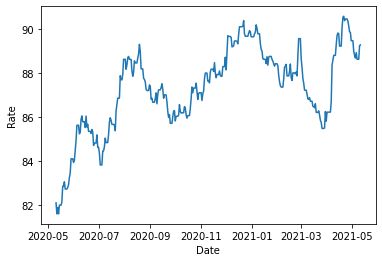

In [7]:
now = datetime.datetime.now()
start = datetime.datetime(now.year -1, now.month, now.day)
end = datetime.datetime(now.year, now.month, now.day)
start_date = start.strftime("%d/%m/%Y")
end_date = end.strftime("%d/%m/%Y")
print("Exchange Rate of ",local_currency,"/",to_currency,"for last One year ( i.e. from ",start_date," to ",end_date," )")
day_count = (end - start).days + 1
period=[]
exrate=array.array('f',[])
for tf in [d for d in (start + timedelta(n) for n in range(day_count)) if d <= end]:
  er=c.get_rate(local_currency,to_currency,tf)
  period.append(tf)
  exrate.append(er)

row=pd.DataFrame({'Date':period,'Exchange_rate':exrate})
print(row)
plt.plot(row['Date'],row['Exchange_rate'])
plt.xlabel("Date")  
plt.ylabel("Rate")  
plt.show()